### numpy 基础操作


使用 numpy 创建多维数组


In [3]:
import numpy as np

mul = np.array([[1, 2, 3], [4, 5, 6]])
# 打印大小
print(mul.shape)
# 获取某一个位置上的数字
print(mul[0])
print(mul[0, 2])

(2, 3)
[1 2 3]
3


查看数组的最大维度


In [8]:
mul = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])
print(mul.shape)
print(mul.ndim)  # 返回最大维度
print(mul.size)  # 返回数字个数 2x2x3=12
print(mul.dtype)  # 返回元素的类型

(2, 2, 3)
3
12
int64


In [12]:
a = np.array([[1, 2, 3], [4, "hello", 5], [7, 8, 9]])
print(a.dtype)  # <U21 -> 字符串数 <= 21
print(type(a[0, 0]))  # 由于 "hello" 的存在，全部被转化为: str
print(a[0, 0].dtype)

<U21
<class 'numpy.str_'>
<U1


使用 numpy 创建数组可以指定数组的类型，numpy 会尝试自动转化


In [ ]:
a = np.array(
    [[1, 2, 3], [4, "32", 5], [7, 8, 9]], dtype=np.int32
)  # "32" 可以被转化为数字
print(a.dtype)
print(a[1, 1].dtype)
print(a[1, 1])

int32
int32
32


In [29]:
mul = np.array([[1, 2, 3], [4, 5, 6]], dtype="<U1")
print(mul.dtype)

<U1


太离谱的不行~


In [15]:
a = np.array([[1, 2, 3], [4, "hello", 5], [7, 8, 9]], dtype=np.float32)
# print(a.dtype)
# print(a[1, 1].dtype)

ValueError: could not convert string to float: 'hello'

如果 np.array 中的数据类型过于复杂 -> 包括了字典,集合等数据类型。由于 numpy 背后底层的 C 语言无法解析，所以整个 array 中的元素退回到了最原始的 python object 中，这就导致 numpy 一些方法不再可用尽管 `type(a) == <class 'numpy.ndarray'>`


In [24]:
# 这个情况下我们可以对 np.int64 使用 dtype
a = np.array([[1, 2, 3], [4, 5, 6]])
print(type(a[0, 1]))
print(a[0, 1].dtype)

<class 'numpy.int64'>
int64


In [27]:
# 使用方法报错
d = {"name": "Landon"}
a = np.array([[1, 2, 3], [4, d, 6]])
print(a.dtype)  # 为 object 而不是 numpy 中的数据类型
print(type(a))
print(type(a[0, 1]))
print(a[0, 1].dtype)  # 由于为基础的 int 类型，故使用 np 的方法报错

object
<class 'numpy.ndarray'>
<class 'int'>


AttributeError: 'int' object has no attribute 'dtype'

### numpy 快速创建数组


In [31]:
# 一个 2x3x4 的矩阵，全用 9 填充

a = np.full((2, 3, 4), 9)
print(a)

[[[9 9 9 9]
  [9 9 9 9]
  [9 9 9 9]]

 [[9 9 9 9]
  [9 9 9 9]
  [9 9 9 9]]]


In [33]:
a = np.zeros((2, 5, 2))
b = np.ones((2, 5, 2))
print(a)
print(b)

[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
[[[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]]


In [34]:
x_value = np.arange(0, 10, 0.5)  # 创建一个 range 数组
print(x_value)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


In [35]:
x_value = np.linspace(0, 10, 3)
x_value  # 10 / (3-1) 作为步长

array([ 0.,  5., 10.])

### 特殊字符

`nan` 表示缺失值; `inf` 表示无限大


In [38]:
print(np.nan)
print(np.inf)

nan
inf


In [41]:
# 判断是否为特殊值
print(np.isnan(np.nan))
print(np.isnan(np.sqrt(-1)))
print(np.isinf(np.array([10]) / 0))

True
True
[ True]


/tmp/ipython-input-1845142053.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.isnan(np.sqrt(-1)))
/tmp/ipython-input-1845142053.py:4: RuntimeWarning: divide by zero encountered in divide
  print(np.isinf(np.array([10]) / 0))


### 使用 numpy 进行数学运算


In [42]:
a = [1, 2, 3]
b = [1, 2, 3]
print(np.dot(a, b))

14


其实使用 numpy 进行数学运算和 matlab 基本是差不多的逻辑，所以我在这儿不再赘述了，问 AI 基本能解决 99% 的问题，用法和 matlab 基本一致


### np.array 操作


In [52]:
a = np.array([1, 2, 3])
# 追加元素
print(np.append(a, [7, 8, 9]))
print(a)  # 不会直接在原变量上进行改变

[1 2 3 7 8 9]
[1 2 3]


In [53]:
# 插入元素到指定位置
a = np.insert(a, 3, [4, 5, 6])
print(a)

[1 2 3 4 5 6]


从 np.array 中删除元素
由于删除元素之后，矩阵往往不再保持原形，故 numpy 会直接将数据降为 1 维


In [54]:
# 从指定位置删除元素
a = np.array([[1, 2, 3], [4, 5, 6]])
# np.array 的索引排序方式是从左到右，从上到下
print(np.delete(a, 1))  # 不指定 axis 的话是删除单个元素

[1 3 4 5 6]


In [56]:
# 从指定axis删除元素
a = np.array([[1, 2, 3], [4, 5, 6]])
print(np.delete(a, 1, 0))  # axis = 0 表示行
print(np.delete(a, 1, 1))  # axis = 1 表示列

[[1 2 3]]
[[1 3]
 [4 6]]


### 重构 np.arrray 的结构


In [63]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(a.shape)
print(a.reshape(5, 2))  # 按行重新排列
print(a.reshape(5, int(a.size / 5)))

(2, 5)
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [66]:
# 如果你希望 reshape 的结果立马传入 a 变量中，需要使用 resize
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
a.resize(5, 2)
print(a)  # 立刻发生改变

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


将高维数组展平：

1. `faltten()` 返回数组的 copy 形式（修改不影响原数组）
2. `ravel()` 返回原数组的快照（修改影响原数组）


In [69]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(a.flatten())
var1 = a.flatten()
var1[1] = 99
print(a)
print(var1)

[ 1  2  3  4  5  6  7  8  9 10]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[ 1 99  3  4  5  6  7  8  9 10]


In [70]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
var2 = a.ravel()  # 返回快照
print(var2)
var2[1] = 99
print(var2)
print(a)  # 原数组也发生了变化

[ 1  2  3  4  5  6  7  8  9 10]
[ 1 99  3  4  5  6  7  8  9 10]
[[ 1 99  3  4  5]
 [ 6  7  8  9 10]]


### 矩阵变换


In [72]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(a)
a.T  # a.transpose()

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [73]:
# 可以使用 swapaxes 函数交换指定两个轴的数组
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
a.swapaxes(0, 1)  # 这里和转置的效果一样

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

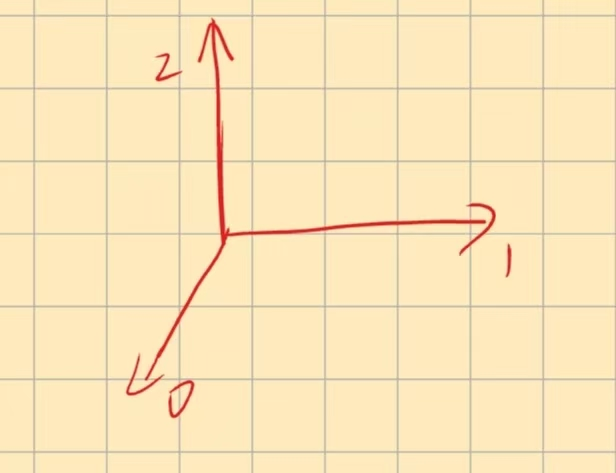


In [ ]:
a = np.array([[[1, 2, 3], [4, 5, 6]], [[11, 22, 33], [44, 55, 66]]])
print(a, end="\n" + "*" * 20 + "\n")
print(a.swapaxes(0, 2))  # 行方向为 0, 列方向为 1, 垂直方向为 2

[[[ 1  2  3]
  [ 4  5  6]]

 [[11 22 33]
  [44 55 66]]]
********************
[[[ 1 11]
  [ 4 44]]

 [[ 2 22]
  [ 5 55]]

 [[ 3 33]
  [ 6 66]]]


### 数组拼接

拼接输入的两个数组都需要用元组表示


In [83]:
a1 = np.array([[1, 2, 3], [4, 5, 6]])
a2 = np.array([[7, 8, 9], [10, 11, 12]])
a = np.concatenate((a1, a2), axis=0)
print(a)  # 按行拼接
a = np.concatenate((a1, a2), axis=1)
print(a)  # 按列拼接

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


我们可以将两个二维数组“堆叠起来”获得三维数组

即为 batch_size


In [89]:
a1 = np.array([[1, 2, 3], [4, 5, 6]])
a2 = np.array([[7, 8, 9], [10, 11, 12]])
a = np.stack((a1, a2))
print(a)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


### 数组拆分


In [93]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print(np.split(a, 2, axis=0))
print(np.split(a, 3, axis=1))

[array([[1, 2, 3],
       [4, 5, 6]]), array([[ 7,  8,  9],
       [10, 11, 12]])]
[array([[ 1],
       [ 4],
       [ 7],
       [10]]), array([[ 2],
       [ 5],
       [ 8],
       [11]]), array([[ 3],
       [ 6],
       [ 9],
       [12]])]


### 基础运算函数


In [18]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# 计算一些统计信息
print(a.min())
print(a.max())
print(a.mean())
print(a.std())  # 标准差
print(a.var())  # 方差
print(a.sum())
print(np.median(a))

1
12
6.5
3.452052529534663
11.916666666666666
78
6.5


### `np.random` 使用


In [16]:
number = np.random.randint(0, 10, size=(2, 3))  # 指定生成形状
print(number)

[[7 4 1]
 [7 1 9]]


In [17]:
# 生成符合正态分布的数字
number = np.random.normal(loc=170, scale=15, size=(5, 10))
print(number)

[[142.48951211 154.36962734 195.57609732 174.67823841 169.30409084
  170.96345785 164.34415784 181.1227345  183.142743   182.58688389]
 [174.94801861 146.40676867 190.29491934 179.2400635  157.44830878
  166.53398441 158.7415007  176.57624715 172.76552529 184.32510078]
 [168.37964964 173.4858211  163.18824692 180.84966372 162.37069997
  175.93214892 159.05967594 167.10022681 157.57823761 159.03081251]
 [156.47854847 169.17442257 184.37013238 167.3355882  166.77661569
  161.92963621 163.25818593 172.35416692 192.00923201 142.85841495]
 [176.09792821 167.81342494 152.84554408 169.91750848 166.7087366
  168.39721537 169.29867051 197.18386492 186.96512208 147.86260839]]


In [20]:
# 从选项中选出想要的形状
number = np.random.choice([10, 20, 30, 40], size=(2, 3))
print(number)

[[40 30 10]
 [40 10 10]]


### 保存和导出数组


In [ ]:
# 使用 .npy 文件
np.save("number.npy", a)

In [4]:
a = np.load("number.npy")
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# 保存为 csv 文件
np.savetxt("number.csv", a, delimiter=",")

In [ ]:
a = np.loadtxt("number.csv", delimiter=",")
print(a)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
